# Prepare data

In [ ]:
# Data Collection, Data Cleaning & Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

# Model Building
import itertools
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, RNN, Input, Bidirectional
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.metrics import accuracy_score, mean_squared_error as mse
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/IELTS Features Influence Analysis/student_topic_analysis_results - Sheet1.csv')
df= df[['mean hesitation', 'mean conf', 'grammar point', 'unique word (%)', '% rare words', 'words', 'IELTS speaking score']]
df=df.dropna(axis=0, how='any')
df['grammar point']=df['grammar point'].astype(float)
df = df.rename(columns={'IELTS speaking score': 'Score'})
df = df.rename(columns={'% rare words': 'Rare word'})
df = df.rename(columns={'unique word (%)': 'Unique word'})
df = df.rename(columns={'words': 'Number of word'})
df = df.rename(columns={'grammar point': 'Grammar point'})
df = df.rename(columns={'mean hesitation': 'Mean hesitation'})
df = df.rename(columns={'mean conf': 'Mean conf'})

feat_cols = ['Mean hesitation', 'Mean conf', 'Grammar point', 'Unique word', 'Rare word', 'Number of word']


In [ ]:
# split train/val/test
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state = 42)

In [ ]:
X_test = testset[['Mean hesitation', 'Mean conf', 'Grammar point', 'Unique word', 'Rare word', 'Number of word']]
y_test = testset[['Score']]

X_train = trainset[['Mean hesitation', 'Mean conf', 'Grammar point', 'Unique word', 'Rare word', 'Number of word']]
y_train = trainset[['Score']]

# Oversampling and Undersampling data

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:
# Chia train dataset để áp dụng Near Miss
majority1 = trainset[trainset['Score'].isin([55.0, 60.0])]
X_tr_miss = majority1[['Mean hesitation', 'Mean conf', 'Grammar point', 'Unique word', 'Rare word', 'Number of word']]
y_tr_miss = majority1[['Score']]

# Chia train dataset để áp dụng Oversampling
#minority1 = trainset[trainset['Score'].isin([50.0, 40.0, 70.0, 65.0, 80.0, 45.0 ])]

## Áp dụng SMOTE
smoteset = trainset[trainset['Score'].isin([40.0, 70.0, 80.0, 45.0])]
X_tr_smote = smoteset[['Mean hesitation', 'Mean conf', 'Grammar point', 'Unique word', 'Rare word', 'Number of word']]
y_tr_smote = smoteset[['Score']]
## Áp dụng Random Oversampling
randomset = trainset[trainset['Score'].isin([50.0, 65.0])]
X_tr_random = randomset[['Mean hesitation', 'Mean conf', 'Grammar point', 'Unique word', 'Rare word', 'Number of word']]
y_tr_random = randomset[['Score']]

In [ ]:
print('Before using Near Miss-UnderSampling, the shape of X_tr_miss: {}'.format(X_tr_miss.shape))
print('Before using Near Miss-UnderSampling, the shape of y_tr_miss: {} \n'.format(y_tr_miss.shape))
miss = NearMiss()
X_tr_miss, y_tr_miss = miss.fit_resample(X_tr_miss, y_tr_miss)
print('After using Near Miss-UnderSampling, the shape of X_tr_miss: {}'.format(X_tr_miss.shape))
print('After using Near Miss-UnderSampling, the shape of y_tr_miss: {} \n'.format(y_tr_miss.shape))

print('Before using SMOTE-Oversampling, the shape of X_tr_smote: {}'.format(X_tr_smote.shape))
print('Before using SMOTE-Oversampling, the shape of y_tr_smote: {} \n'.format(y_tr_smote.shape))
smote = SMOTE(random_state=2)
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr_smote, y_tr_smote)
print('After using SMOTE-Oversampling, the shape of X_tr_smote: {}'.format(X_tr_smote.shape))
print('After using SMOTE-Oversampling, the shape of y_tr_smote: {} \n'.format(y_tr_smote.shape))

Before using Near Miss-UnderSampling, the shape of X_tr_miss: (335, 6)
Before using Near Miss-UnderSampling, the shape of y_tr_miss: (335, 1) 

After using Near Miss-UnderSampling, the shape of X_tr_miss: (296, 6)
After using Near Miss-UnderSampling, the shape of y_tr_miss: (296, 1) 

Before using SMOTE-Oversampling, the shape of X_tr_smote: (88, 6)
Before using SMOTE-Oversampling, the shape of y_tr_smote: (88, 1) 

After using SMOTE-Oversampling, the shape of X_tr_smote: (216, 6)
After using SMOTE-Oversampling, the shape of y_tr_smote: (216, 1) 



In [ ]:
print('Before using Random Oversampling, the shape of X_tr_random: {}'.format(X_tr_random.shape))
print('Before using Random Oversampling, the shape of y_tr_random: {} \n'.format(y_tr_random.shape))
random = RandomOverSampler(random_state = 2)
X_tr_random, y_tr_random = random.fit_resample(X_tr_random, y_tr_random)
print('After using Random Oversampling, the shape of X_tr_random: {}'.format(X_tr_random.shape))
print('After using Random Oversampling, the shape of y_tr_random: {} \n'.format(y_tr_random.shape))

Before using Random Oversampling, the shape of X_tr_random: (236, 6)
Before using Random Oversampling, the shape of y_tr_random: (236, 1) 

After using Random Oversampling, the shape of X_tr_random: (300, 6)
After using Random Oversampling, the shape of y_tr_random: (300, 1) 



In [ ]:
X_train = pd.concat([X_tr_miss, X_tr_smote, X_tr_random])
y_train = pd.concat([y_tr_miss, y_tr_smote, y_tr_random])
print(X_train.shape, y_train.shape)


(812, 6) (812, 1)


## Linear Model Inspection

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

model = make_pipeline(StandardScaler(), RidgeCV())

model.fit(X_train, y_train)

print(f"model score on training data: {model.score(X_train, y_train)}")
print(f"model score on testing data: {model.score(X_test, y_test)}")

model score on training data: 0.32269631299363166
model score on testing data: -0.13251074923848627


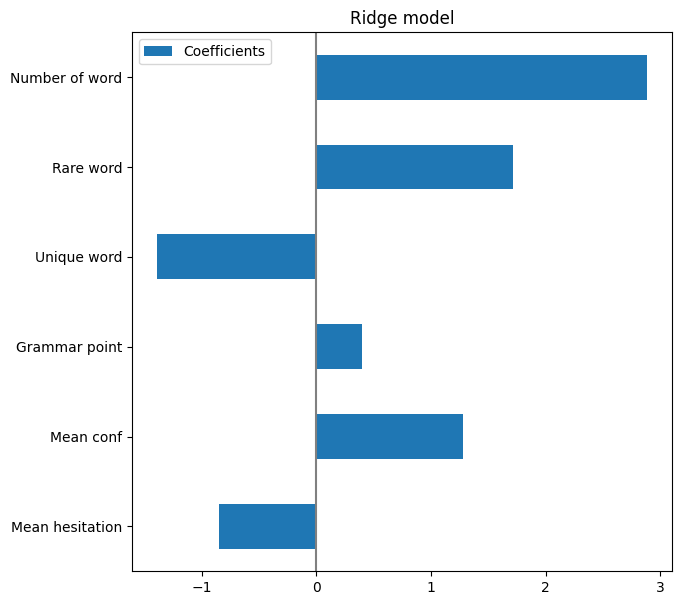

In [ ]:
coefs = pd.DataFrame(
    model[1].coef_.T, columns=["Coefficients"], index=X_train.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

The plot above tells us about dependencies between a specific feature and the target when all other features remain constant, i.e., conditional dependencies

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


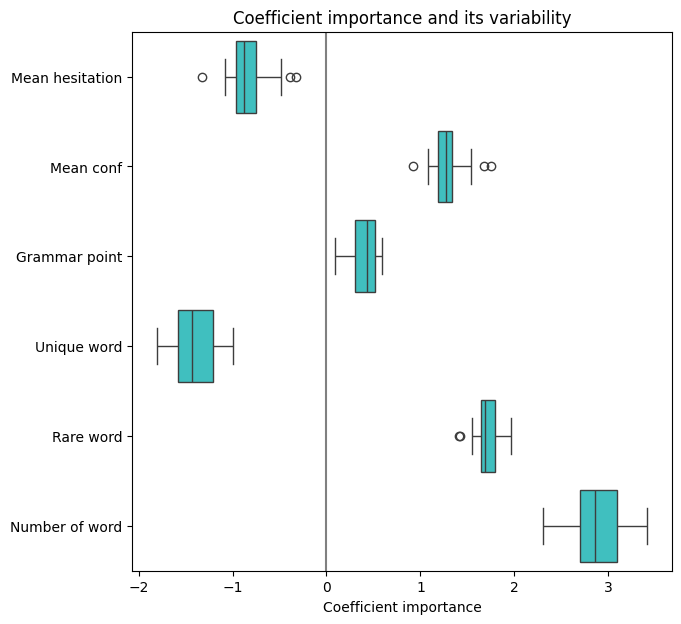

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv_model = cross_validate(
    model,
    X_train,
    y_train,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [model[1].coef_.reshape(-1) for model in cv_model["estimator"]],
    columns=X_train.columns,
)
plt.figure(figsize=(9, 7))
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.subplots_adjust(left=0.3)

Every coefficient looks pretty stable, which mean that different Ridge model put almost the same weight to the same feature.

In it important to keep in mind that the associations extracted depend on the model. To illustrate this point we consider a Lasso model, that performs feature selection with a L1 penalty. Let us fit a Lasso model with a strong regularization parameters alpha

In [ ]:
from sklearn.linear_model import Lasso

model = make_pipeline(StandardScaler(), Lasso(alpha=0.015))

model.fit(X_train, y_train)

print(f"model score on training data: {model.score(X_train, y_train)}")
print(f"model score on testing data: {model.score(X_test, y_test)}")

model score on training data: 0.3227104214244535
model score on testing data: -0.13508136860775877


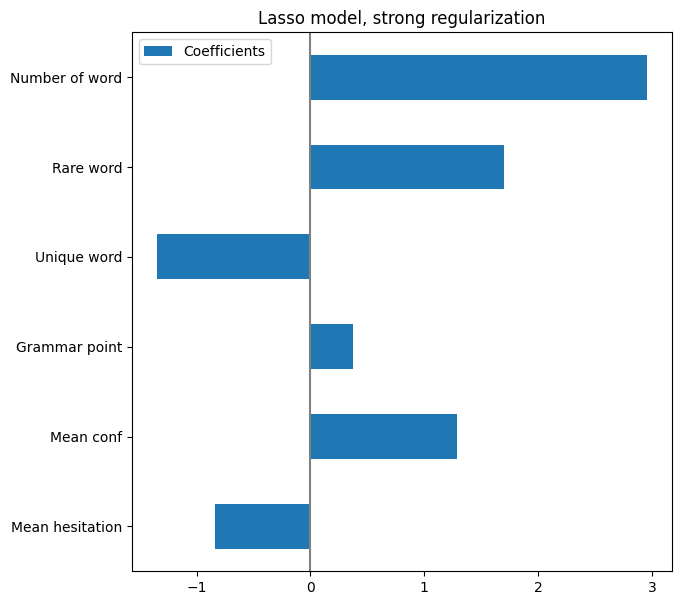

In [ ]:
coefs = pd.DataFrame(
    model[1].coef_, columns=["Coefficients"], index=X_train.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Lasso model, strong regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

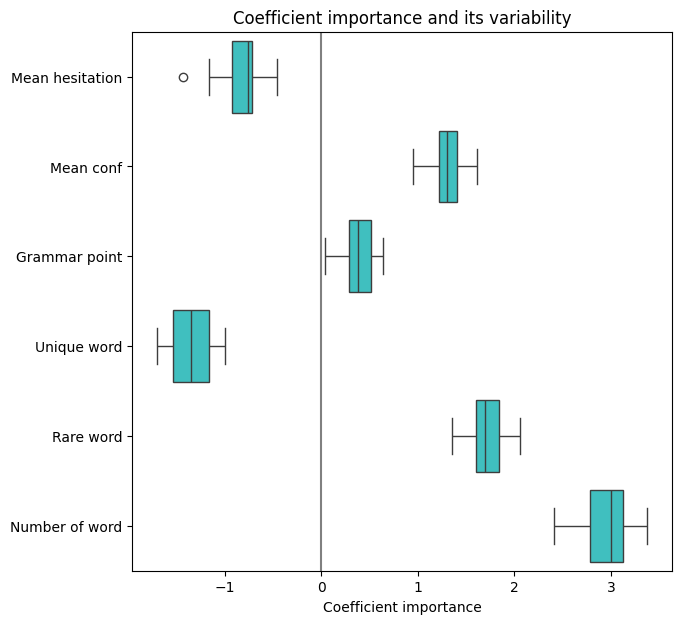

In [ ]:
cv_model = cross_validate(
    model,
    X_train,
    y_train,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [model[1].coef_ for model in cv_model["estimator"]],
    columns=X_train.columns,
)
plt.figure(figsize=(9, 7))
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.subplots_adjust(left=0.3)

## Random forest feature_importances_

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

print(f"model score on training data: {model.score(X_train, y_train)}")
print(f"model score on testing data: {model.score(X_test, y_test)}")

<ipython-input-16-d6ed02b6c865>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


model score on training data: 0.9504993509233519
model score on testing data: 0.061370621974535244


In [ ]:
importances = model.feature_importances_

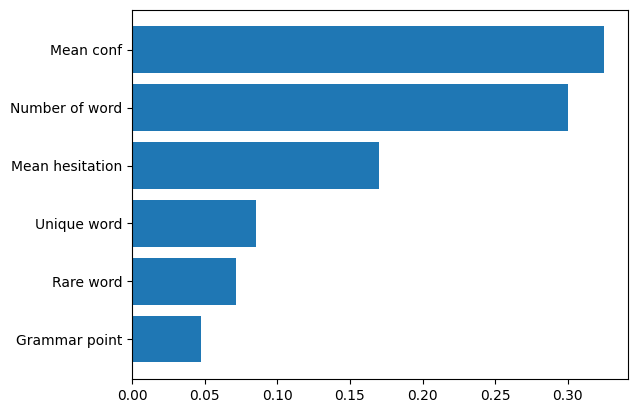

In [ ]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

## Feature importance by permutation

In [ ]:
# Any model could be used here

from sklearn.svm import SVC
gbm = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=20)
gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="l1", callbacks=[lgb.early_stopping(5)])

print(f"model score on training data: {model.score(X_train, y_train)}")
print(f"model score on testing data: {model.score(X_test, y_test)}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 980
[LightGBM] [Info] Number of data points in the train set: 812, number of used features: 6
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 57.832512
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[9]	valid_0's l1: 5.06986	valid_0's l2: 39.0223
model score on training data: 0.9530814750980441
model score on testing data: 0.037776085099458845


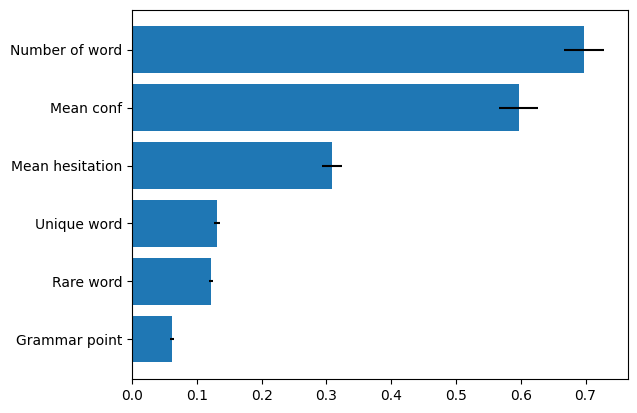

In [ ]:
def get_score_after_permutation(model, X, y, curr_feat):
    """return the score of model when curr_feat is permuted"""

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values
    )

    permuted_score = model.score(X_permuted, y)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """compare the score when curr_feat is permuted"""

    baseline_score_train = model.score(X, y)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance


def permutation_importance(model, X, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in X.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, X, y, curr_feat)
            )

        importances.append(list_feature_importance)

    return {
        "importances_mean": np.mean(importances, axis=1),
        "importances_std": np.std(importances, axis=1),
        "importances": importances,
    }


# This function could directly be access from sklearn
# from sklearn.inspection import permutation_importance
def plot_feature_importances(perm_importance_result, feat_name):
    """bar plot the feature importance"""

    fig, ax = plt.subplots()

    indices = perm_importance_result["importances_mean"].argsort()
    plt.barh(
        range(len(indices)),
        perm_importance_result["importances_mean"][indices],
        xerr=perm_importance_result["importances_std"][indices],
    )

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])
perm_importance_result_train = permutation_importance(
    model, X_train, y_train, n_repeats=10
)

plot_feature_importances(perm_importance_result_train, X_train.columns)

# Feature Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler



# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
X_train = scaler.transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)

# Output the results
print("Scaled X_train:")
print(X_train)

print("Scaled X_test:")
print(X_test)

Scaled X_train:
[[-0.30799206  0.65546293  0.79268657 -0.55779198 -0.66191661 -0.19878863]
 [ 1.58941971 -1.29845728  0.79268657 -0.72936303 -0.04873393 -0.23462868]
 [-0.27031478  0.65523921  0.79268657 -0.81514855  0.15566029 -0.02470836]
 ...
 [ 3.23537864 -1.99180804  0.79268657 -0.72936303  0.56444875  2.37145528]
 [-0.38039947  0.4176466   0.79268657 -0.55779198 -1.27509928 -0.16806858]
 [-0.08437642  0.19741324  0.2466627  -0.38622093  0.15566029 -0.03494838]]
Scaled X_test:
[[-4.07977786e-01  4.78263643e-01  8.70689984e-01 -9.00934078e-01
   7.68842971e-01  1.56761406e+00]
 [-4.87494265e-01  5.61857046e-01  8.70689984e-01 -9.00934078e-01
   1.17763142e+00  1.00953321e+00]
 [-4.23806749e-01  4.21892587e-01 -2.17144303e+00  3.00063261e-01
   1.58641987e+00 -5.87909219e-01]
 [-3.03110155e-01  5.38363410e-01  7.92686574e-01 -9.00934078e-01
   1.58641987e+00  2.01817474e+00]
 [ 1.26915605e-01 -6.15065730e-01 -6.53509434e-02  3.85848785e-01
  -1.68388773e+00 -7.61989484e-01]
 [-5.748

In [ ]:
len(X_train)

812

In [ ]:
# Concatenate X_train and X_test vertically
# X_combined = pd.concat([X_train, X_test], ignore_index=True)

# # Concatenate y_train and y_test vertically
# y_combined = pd.concat([y_train, y_test], ignore_index=True)

# Merge the resulting DataFrames horizontally
final_combined = pd.concat([X_train, y_train], axis=1)
final_combined

,Mean hesitation,Mean conf,Grammar point,Unique word,Rare word,Number of word,Score
0,0.212820,0.976796,99.0,52.0,16.0,223.0,55.0
1,1.276131,0.739684,99.0,50.0,19.0,216.0,55.0
2,0.233935,0.976769,99.0,49.0,20.0,257.0,55.0
3,0.155683,0.943088,99.0,62.0,17.0,226.0,55.0
4,0.158567,0.945801,74.0,55.0,19.0,177.0,55.0
...,...,...,...,...,...,...,...
295,0.238973,0.937016,92.0,68.0,16.0,152.0,50.0
296,1.723826,0.226841,97.0,54.0,22.0,345.0,50.0
297,2.198528,0.655545,99.0,50.0,22.0,725.0,50.0
298,0.172243,0.947937,99.0,52.0,13.0,229.0,50.0


In [ ]:
corr_matrix = final_combined.corr().corr(method='pearson')
high_corr = abs(corr_matrix)['Score'].sort_values(ascending=False).to_frame().reset_index()
high_corr.columns = ['features', 'Corr']
highcorr_features = high_corr['features']
for f in highcorr_features:
  print(f, ':', stats.pearsonr(df[f], df['Score']))

Score : PearsonRResult(statistic=0.9999999999999996, pvalue=0.0)
Number of word : PearsonRResult(statistic=0.29825805670425637, pvalue=2.1619603049048083e-18)
Unique word : PearsonRResult(statistic=-0.2992509945702137, pvalue=1.6487842320667577e-18)
Grammar point : PearsonRResult(statistic=0.1871869742282859, pvalue=6.19651511322426e-08)
Rare word : PearsonRResult(statistic=0.2564754993089833, pvalue=7.634908990136088e-14)
Mean conf : PearsonRResult(statistic=0.13639069074193846, pvalue=8.580719314006717e-05)
Mean hesitation : PearsonRResult(statistic=-0.017570145994761744, pvalue=0.6145204878063555)


In [ ]:
list_f = ['Mean hesitation', 'Mean conf', 'Grammar point', 'Unique word', 'Rare word', 'Number of word']
i = 1
i = 1
plt.figure(figsize=(20,15))
for l in list_f:
  plt.subplot(3,3,i)
  sns.boxplot(data=df, y=l, x='score')
  plt.title('Boxplot of IELTS speaking score versus '+  l)
  i+=1

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error
def rae_score(y_true, y_pred):
    return np.sum(np.abs(y_pred - y_true)) / np.sum(np.abs(np.mean(y_true) - y_true))
def short_metrics(preds, labels, train_labels, many_shot_thr=100, low_shot_thr=75):
  train_class_count, test_class_count = [], []
  mse_per_class, msle_per_class, rae_per_class = [], [], []
  for l in np.unique(np.floor(labels)):
    train_class_count.append(len(train_labels[np.floor(train_labels)==l]))
    test_class_count.append(len(labels[np.floor(labels)==l]))
    mse_per_class.append(np.sum((preds[np.floor(labels)==l]-labels[np.floor(labels)==l])**2))
    msle_per_class.append(np.sum(np.abs(preds[np.floor(labels)==l]-labels[np.floor(labels)==l])))
    rae_per_class.append(rae_score(labels[np.floor(labels)==l],preds[np.floor(labels)==l]))

  many_shot_mse, median_shot_mse, low_shot_mse = [], [], []
  many_shot_msle, median_shot_msle, low_shot_msle = [], [], []
  many_shot_rae, median_shot_rae, low_shot_rae = [], [], []
  many_shot_cnt, median_shot_cnt, low_shot_cnt = [], [], []
  for i in range(len(train_class_count)):
      if train_class_count[i] > many_shot_thr:
          many_shot_mse.append(mse_per_class[i])
          many_shot_msle.append(msle_per_class[i])
          many_shot_rae.append(rae_per_class[i])
          many_shot_cnt.append(test_class_count[i])
      elif train_class_count[i] < low_shot_thr:
          low_shot_mse.append(mse_per_class[i])
          low_shot_msle.append(msle_per_class[i])
          low_shot_rae.append(rae_per_class[i])
          low_shot_cnt.append(test_class_count[i])
      else:
          median_shot_mse.append(mse_per_class[i])
          median_shot_msle.append(msle_per_class[i])
          median_shot_rae.append(rae_per_class[i])
          median_shot_cnt.append(test_class_count[i])

  shot_dict = {}
  shot_dict['many mse'] = np.sum(many_shot_mse) / np.sum(many_shot_cnt)
  shot_dict['many msle'] = np.sum(many_shot_msle) / np.sum(many_shot_cnt)
  shot_dict['many rae'] = np.sum(many_shot_rae) / np.sum(many_shot_cnt)
  shot_dict['median mse'] = np.sum(median_shot_mse) / np.sum(median_shot_cnt)
  shot_dict['median msle'] = np.sum(median_shot_msle) / np.sum(median_shot_cnt)
  shot_dict['median rae'] = np.sum(median_shot_rae) / np.sum(median_shot_cnt)
  shot_dict['low mse'] = np.sum(low_shot_mse) / np.sum(low_shot_cnt)
  shot_dict['low msle'] = np.sum(low_shot_msle) / np.sum(low_shot_cnt)
  shot_dict['low rae'] = np.sum(low_shot_rae) / np.sum(low_shot_cnt)

  mse = mean_squared_error(preds, labels)
  msle =  mean_squared_log_error(preds, labels)
  rae = rae_score(labels, preds)
  print(f" * Overall: MSE {mse:.3f}\tMSLE {msle:.3f}\tRAE {rae:.3f}")
  print(f" * Many: MSE {shot_dict['many mse']:.3f}\t"
              f"MSLE {shot_dict['many msle']:.3f}\tRAE score {shot_dict['many rae']:.3f}")
  print(f" * Median: MSE {shot_dict['median mse']:.3f}\t"
              f"MSLE {shot_dict['median msle']:.3f}\tRAE score {shot_dict['median rae']:.3f}")
  print(f" * Low: MSE {shot_dict['low mse']:.3f}\t"
              f"MSLE {shot_dict['low msle']:.3f}\tRAE score {shot_dict['low rae']:.3f}")

  return None

# LightGBM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
gbm = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.0001, n_estimators=20)
gbm.fit(X_train, y_train,  eval_set=[(X_test, y_test)],  eval_metric=['mae', 'mean_squared_log_error'], callbacks=[lgb.early_stopping(5)])
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# eval
rmse_test = mean_squared_error(y_test, y_pred)
print(f"The RMSE of prediction is: {rmse_test}")

# feature importances
print(f"Feature importances: {list(gbm.feature_importances_)}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 982
[LightGBM] [Info] Number of data points in the train set: 812, number of used features: 6
[LightGBM] [Info] Start training from score 57.832512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train.shape

(812, 6)

In [ ]:
short_metrics(np.squeeze(y_pred), np.squeeze(y_test.to_numpy()), np.squeeze(y_train.to_numpy()))

 * Overall: MSE 45.401	MSLE 0.014	RAE 1.011
 * Many: MSE 24.755	MSLE 4.340	RAE score inf
 * Median: MSE nan	MSLE nan	RAE score nan
 * Low: MSE 172.866	MSLE 13.013	RAE score inf


<ipython-input-33-734f9daffccb>:3: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sum(np.abs(y_pred - y_true)) / np.sum(np.abs(np.mean(y_true) - y_true))
<ipython-input-33-734f9daffccb>:39: RuntimeWarning: invalid value encountered in scalar divide
  shot_dict['median mse'] = np.sum(median_shot_mse) / np.sum(median_shot_cnt)
<ipython-input-33-734f9daffccb>:40: RuntimeWarning: invalid value encountered in scalar divide
  shot_dict['median msle'] = np.sum(median_shot_msle) / np.sum(median_shot_cnt)
<ipython-input-33-734f9daffccb>:41: RuntimeWarning: invalid value encountered in scalar divide
  shot_dict['median rae'] = np.sum(median_shot_rae) / np.sum(median_shot_cnt)


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression().fit(X_train, y_train)
y_pred=logistic.predict(X_test)
short_metrics(np.squeeze(y_pred), np.squeeze(y_test.to_numpy()), np.squeeze(y_train.to_numpy()))

 * Overall: MSE 94.091	MSLE 0.029	RAE 1.298
 * Many: MSE 88.556	MSLE 6.937	RAE score inf
 * Median: MSE nan	MSLE nan	RAE score nan
 * Low: MSE 128.261	MSLE 8.261	RAE score inf


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-33-734f9daffccb>:3: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sum(np.abs(y_pred - y_true)) / np.sum(np.abs(np.mean(y_true) - y_true))
<ipython-input-33-734f9daffccb>:39: RuntimeWarning: invalid value encountered in scalar divide
  shot_dict['median mse'] = np.sum(median_shot_mse) / np.sum(median_shot_cnt)
<ipython-input-33-734f9daffccb>:40: RuntimeWarning: invalid value encountered in scalar divide
  shot_dict['median msle'] = np.sum(median_shot_msle) / np.sum(median_shot_cnt)
<ipython-input-33-734f9daffccb>:41: RuntimeWarning: invalid value encountered in scalar divide
  shot_dict['median rae'] = np.sum(median_shot_rae) / np.sum(median_shot_cnt)


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(max_depth=9, random_state=0)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)

<ipython-input-63-b50b46cf3ebd>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X_train, y_train)


In [ ]:
short_metrics(np.squeeze(y_pred), np.squeeze(y_test.to_numpy()), np.squeeze(y_train.to_numpy()))

 * Overall: MSE 56.818	MSLE 0.018	RAE 0.922
 * Many: MSE 47.711	MSLE 4.754	RAE score inf
 * Median: MSE nan	MSLE nan	RAE score nan
 * Low: MSE 113.043	MSLE 6.957	RAE score inf


<ipython-input-33-734f9daffccb>:3: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sum(np.abs(y_pred - y_true)) / np.sum(np.abs(np.mean(y_true) - y_true))
<ipython-input-33-734f9daffccb>:39: RuntimeWarning: invalid value encountered in scalar divide
  shot_dict['median mse'] = np.sum(median_shot_mse) / np.sum(median_shot_cnt)
<ipython-input-33-734f9daffccb>:40: RuntimeWarning: invalid value encountered in scalar divide
  shot_dict['median msle'] = np.sum(median_shot_msle) / np.sum(median_shot_cnt)
<ipython-input-33-734f9daffccb>:41: RuntimeWarning: invalid value encountered in scalar divide
  shot_dict['median rae'] = np.sum(median_shot_rae) / np.sum(median_shot_cnt)


# SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
short_metrics(np.squeeze(y_pred), np.squeeze(y_test.to_numpy()), np.squeeze(y_train.to_numpy()))

 * Overall: MSE 73.636	MSLE 0.022	RAE 1.060
 * Many: MSE 75.352	MSLE 5.915	RAE score inf
 * Median: MSE nan	MSLE nan	RAE score nan
 * Low: MSE 63.043	MSLE 5.217	RAE score inf


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-33-734f9daffccb>:3: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sum(np.abs(y_pred - y_true)) / np.sum(np.abs(np.mean(y_true) - y_true))
<ipython-input-33-734f9daffccb>:39: RuntimeWarning: invalid value encountered in scalar divide
  shot_dict['median mse'] = np.sum(median_shot_mse) / np.sum(median_shot_cnt)
<ipython-input-33-734f9daffccb>:40: RuntimeWarning: invalid value encountered in scalar divide
  shot_dict['median msle'] = np.sum(median_shot_msle) / np.sum(median_shot_cnt)
<ipython-input-33-734f9daffccb>:41: RuntimeWarning: invalid value encountered in scalar divide
  shot_dict['median rae'] = np.sum(median_shot_rae) / np.sum(median_shot_cnt)


# CatBoost

In [ ]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

# Initialize CatBoostRegressor
catboost = CatBoostRegressor(iterations=100,
                          learning_rate=1e-4,
                          depth=2)
# Fit catboost
catboost.fit(X_train, y_train)
# Get predictions
y_pred = catboost.predict(y_test)
short_metrics(np.squeeze(y_pred), np.squeeze(y_test.to_numpy()), np.squeeze(y_train.to_numpy()))


0:	learn: 9.8872767	total: 46.6ms	remaining: 4.61s
1:	learn: 9.8869133	total: 47.8ms	remaining: 2.34s
2:	learn: 9.8865370	total: 48.5ms	remaining: 1.57s
3:	learn: 9.8861713	total: 49.4ms	remaining: 1.19s
4:	learn: 9.8857960	total: 50.6ms	remaining: 962ms
5:	learn: 9.8854641	total: 51.7ms	remaining: 809ms
6:	learn: 9.8851499	total: 52.6ms	remaining: 699ms
7:	learn: 9.8848112	total: 53ms	remaining: 609ms
8:	learn: 9.8844661	total: 53.3ms	remaining: 539ms
9:	learn: 9.8841464	total: 53.6ms	remaining: 483ms
10:	learn: 9.8837735	total: 54ms	remaining: 437ms
11:	learn: 9.8834166	total: 54.2ms	remaining: 398ms
12:	learn: 9.8830728	total: 54.6ms	remaining: 365ms
13:	learn: 9.8826960	total: 54.9ms	remaining: 337ms
14:	learn: 9.8823629	total: 55.2ms	remaining: 313ms
15:	learn: 9.8820308	total: 55.6ms	remaining: 292ms
16:	learn: 9.8816876	total: 56.1ms	remaining: 274ms
17:	learn: 9.8813182	total: 56.5ms	remaining: 257ms
18:	learn: 9.8809619	total: 57ms	remaining: 243ms
19:	learn: 9.8806084	total: 

CatBoostError: /src/catboost/catboost/libs/data/model_dataset_compatibility.cpp:72: Feature 1 is present in model but not in pool.

In [ ]:
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"y_train columns: {y_train.columns}")
print(f"y_test columns: {y_test.columns}")

y_train shape: (812, 1)
y_test shape: (165, 1)
y_train columns: Index(['Score'], dtype='object')
y_test columns: Index(['Score'], dtype='object')
